In [100]:
import math
import numpy as np
import matplotlib.pyplot as plt

In here, we use u_v to represent the speed of rain, and it has three components in x, y and z direction. 

And we suppose the lowest speed is 1m/s and highest speed is 7m/s in this model, but it can be change. 


Besides, if you want more accurate result, you can change step.


d here represent the distance between dormitory and school building.

w represent the relative space density of rain, and we assume it is 1

In [99]:
u_x = 2
u_y = -1
u_z = 1
u_v = [u_x, u_y, u_z] #m/s
down_bound = 1
up_bound = 7.01
step = 0.01
v = np.arange(down_bound, up_bound, step) #m/s
d = 1000 #m
w = 1

S_x, S_y, S_z represent the area where can get caught with rain.

S_x is the front side, S_y is the flank, and the S_z is the top side.

And we search online to find these datas.

In [101]:
S_x = 0.4 #m**2
S_y = 0.15
S_z = 0.06

here r_v represent the relative velocity of people considering the rain is reference frame.

r_v_s is the speed(magnitude) of r_v.

proj_S_x, proj_S_y and proj_S_z are the projection area of S_x, S_y and S_z on the plane which's normal vector is the r_v.

Then we can calculate every Q versus every v, then draw a curve plot.

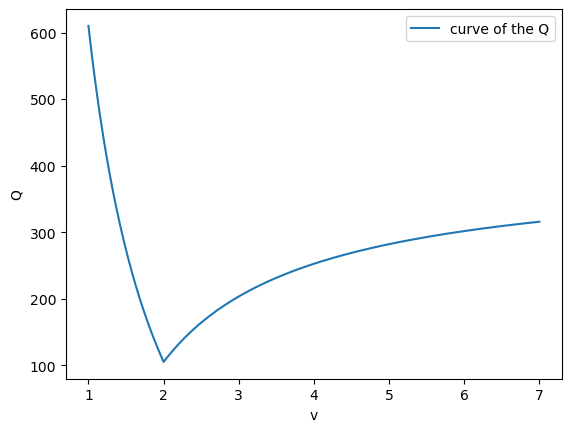

In [102]:
Q_by_v = []
for i, tem in enumerate(v):
    t = d/tem
    r_v = [u_x - tem, u_y, u_z]
    r_v_s = math.sqrt(r_v[0]**2 + r_v[1]**2 + r_v[2]**2)
    cos_x = abs(r_v[0]/r_v_s)
    cos_y = abs(r_v[1]/r_v_s)
    cos_z = abs(r_v[2]/r_v_s)
    proj_S_x = S_x*cos_x
    proj_S_y = S_y*cos_y
    proj_S_z = S_z*cos_z
    S = proj_S_x + proj_S_y + proj_S_z
    Q_1 = w*S*r_v_s*t
    Q_by_v.append(Q_1)
plt.plot(v, Q_by_v, label='curve of the Q')
plt.xlabel("v")
plt.ylabel("Q")
plt.legend(loc="best", prop=font)
plt.show()

In [103]:
x = np.array(Q_by_v)
print("最大淋雨量为",x.max(), sep='')
print("此时速度为", down_bound + x.argmax()*step, "m/s", sep='')
print("最小淋雨量为", x.min(), sep='')
print("此时速度为", down_bound + x.argmin()*step, "m/s", sep='')

最大淋雨量为610.0000000000001
此时速度为1.0m/s
最小淋雨量为105.00000000000011
此时速度为2.0m/s


And we can also find the particular Q versus particualr v(the accuracy must same as the step or may cause some errors)

In [105]:
check = 7
print("速度为", check, "m/s时，淋雨量为", x[(int)((check-1)*(1/step))], sep='')

速度为7m/s时，淋雨量为315.7142857142858
